# 1 Imports

In [ ]:
# Use seaborn for pairplot.
!pip install -q seaborn

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import numpy as np
import pandas as pd

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from threading import Thread

print(tf.__version__)

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

2.12.0


# 2 Prepare Dataset

In [ ]:
dataset = pd.read_csv('./averagedDataset.csv')

X = dataset.drop(['Mouse x', 'Mouse y', 'L eye height', 'R eye height'], axis=1)
Y = dataset.loc[:,['Mouse x', 'Mouse y']]

# Split dataset to training and testing sets by 80:20
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

sns.pairplot(X, diag_kind='kde')

Output hidden; open in https://colab.research.google.com to view.

# Model Training

In [ ]:
X_train_normalised = layers.Normalization(axis=-1)
X_train_normalised.adapt(np.array(X_train))

m = [256, 512, 1024, 2048]
models = [
keras.Sequential([
    X_train_normalised,
    layers.Dense(m[0], activation='relu'),
    layers.Dense(m[0], activation='relu'),
    layers.Dense(m[0], activation='relu'),
    layers.Dense(m[0], activation='relu'),
    layers.Dense(m[0], activation='relu'),
    layers.Dense(m[0], activation='relu'),
    layers.Dense(m[0], activation='relu'),
    layers.Dense(m[0], activation='relu'),
    layers.Dense(m[0], activation='relu'),
    layers.Dense(m[0], activation='relu'),
    layers.Dense(2)
]),
keras.Sequential([
    X_train_normalised,
    layers.Dense(m[1], activation='relu'),
    layers.Dense(m[1], activation='relu'),
    layers.Dense(m[1], activation='relu'),
    layers.Dense(m[1], activation='relu'),
    layers.Dense(m[1], activation='relu'),
    layers.Dense(m[1], activation='relu'),
    layers.Dense(m[1], activation='relu'),
    layers.Dense(m[1], activation='relu'),
    layers.Dense(m[1], activation='relu'),
    layers.Dense(m[1], activation='relu'),
    layers.Dense(2)
]),
keras.Sequential([
    X_train_normalised,
    layers.Dense(m[2], activation='relu'),
    layers.Dense(m[2], activation='relu'),
    layers.Dense(m[2], activation='relu'),
    layers.Dense(m[2], activation='relu'),
    layers.Dense(m[2], activation='relu'),
    layers.Dense(2)
]),
keras.Sequential([
    X_train_normalised,
    layers.Dense(m[3], activation='relu'),
    layers.Dense(m[3], activation='relu'),
    layers.Dense(m[3], activation='relu'),
    layers.Dense(m[3], activation='relu'),
    layers.Dense(m[3], activation='relu'),
    layers.Dense(2)
]),
keras.Sequential([
    X_train_normalised,
    layers.Dense(m[2], activation='relu'),
    layers.Dense(m[2], activation='relu'),
    layers.Dense(m[2], activation='relu'),
    layers.Dense(m[2], activation='relu'),
    layers.Dense(m[2], activation='relu'),
    layers.Dense(m[2], activation='relu'),
    layers.Dense(m[2], activation='relu'),
    layers.Dense(m[2], activation='relu'),
    layers.Dense(m[2], activation='relu'),
    layers.Dense(m[2], activation='relu'),
    layers.Dense(2)
]),
keras.Sequential([
    X_train_normalised,
    layers.Dense(m[3], activation='relu'),
    layers.Dense(m[3], activation='relu'),
    layers.Dense(m[3], activation='relu'),
    layers.Dense(m[3], activation='relu'),
    layers.Dense(m[3], activation='relu'),
    layers.Dense(m[3], activation='relu'),
    layers.Dense(m[3], activation='relu'),
    layers.Dense(m[3], activation='relu'),
    layers.Dense(m[3], activation='relu'),
    layers.Dense(m[3], activation='relu'),
    layers.Dense(2)
])
]

histories = []
for i,model in enumerate(models):
    model.compile(loss='huber_loss',
                  optimizer=tf.keras.optimizers.Adam(0.001))

    print(i)
    histories.append(model.fit(
    X_train,
    Y_train,
    validation_split=0.2,
    verbose=0, epochs=500, batch_size=50))
    
    print(model.evaluate(X_test, Y_test, verbose=0))


Training model 0
Training model 1
Training model 2
Epoch 1/500
Epoch 1/500
Epoch 1/500
135/135 [==============================] - 18s 17ms/step - loss: 358.0918 - val_loss: 207.9231
Epoch 2/500
135/135 [==============================] - 18s 18ms/step - loss: 463.2752 - val_loss: 267.6069
Epoch 2/500
135/135 [==============================] - 19s 19ms/step - loss: 792.7793 - val_loss: 230.0582
Epoch 2/500
135/135 [==============================] - 2s 15ms/step - loss: 228.0455 - val_loss: 232.2667
Epoch 3/500
135/135 [==============================] - 2s 16ms/step - loss: 234.6758 - val_loss: 230.6540
Epoch 3/500
135/135 [==============================] - 2s 16ms/step - loss: 230.8798 - val_loss: 223.9474
Epoch 3/500
135/135 [==============================] - 2s 17ms/step - loss: 216.2663 - val_loss: 281.8382
Epoch 4/500
135/135 [==============================] - 2s 17ms/step - loss: 215.4485 - val_loss: 195.1597
Epoch 4/500
135/135 [==============================] - 2s 16ms/step - loss

Text(0.5, 1.0, 'Main model training error')

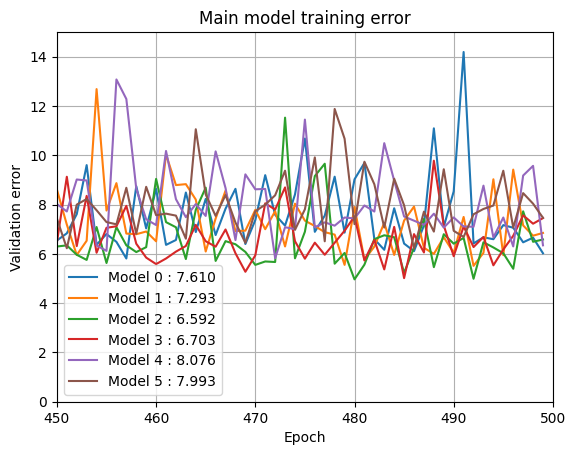

In [ ]:
for i,history in enumerate(histories):
  mean = "%.3f" % np.mean(history.history['val_loss'][450:500])
  l = f'{"Model"} {i} {":"} {mean}'
  plt.plot(history.history['val_loss'], label=l)
  plt.xlabel('Epoch')
  plt.ylabel('Validation error')
  ax = plt.gca()
  ax.set_ylim([0, 15])
  ax.set_xlim([450, 500])
  plt.legend()
  plt.grid(True)
plt.title("Main model training error")

In [ ]:
models[2].save('main_model')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
